In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
import pickle
import joblib

In [ ]:
!cp /content/drive/MyDrive/thesis.py /content

In [ ]:
import thesis
#def IMPORT():
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/CAD_USD_5min.csv')
df.dropna(inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)

df.set_index('timestamp', inplace=True)
print(df.shape)
df.head()

(222650, 4)


,open,close,low,high
timestamp,,,,
2020-01-01 17:00:00,1.29842,1.29845,1.29842,1.29849
2020-01-01 17:05:00,1.29846,1.29857,1.29777,1.29858
2020-01-01 17:10:00,1.29857,1.29803,1.29802,1.29863
2020-01-01 17:15:00,1.29845,1.29800,1.29799,1.29845
2020-01-01 17:20:00,1.29799,1.29816,1.29798,1.29817


In [ ]:
df=thesis.AddingColumn(df)
print(df.shape)
df.head()

(222649, 12)


/content/thesis.py:42: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week'] = df.index.week


,open,close,low,high,previous_close,hour,day,week,momentum,avg_price,range,ohlc_price
timestamp,,,,,,,,,,,,
2020-01-01 17:00:00,1.29842,1.29845,1.29842,1.29849,1.29857,17,2,1,-0.00003,1.298455,0.00007,1.298445
2020-01-01 17:05:00,1.29846,1.29857,1.29777,1.29858,1.29803,17,2,1,-0.00011,1.298175,0.00081,1.298345
2020-01-01 17:10:00,1.29857,1.29803,1.29802,1.29863,1.29800,17,2,1,0.00054,1.298325,0.00061,1.298312
2020-01-01 17:15:00,1.29845,1.29800,1.29799,1.29845,1.29816,17,2,1,0.00045,1.298220,0.00046,1.298223
2020-01-01 17:20:00,1.29799,1.29816,1.29798,1.29817,1.29816,17,2,1,-0.00017,1.298075,0.00019,1.298075


In [ ]:
df=thesis.ApplyPCA(df)
df.head()

,open,close,low,high,previous_close,hour,day,week,momentum,avg_price,range,ohlc_price,pca
timestamp,,,,,,,,,,,,,
2020-01-01 17:00:00,1.29842,1.29845,1.29842,1.29849,1.29857,17,2,1,-0.00003,1.298455,0.00007,1.298445,-25.512453
2020-01-01 17:05:00,1.29846,1.29857,1.29777,1.29858,1.29803,17,2,1,-0.00011,1.298175,0.00081,1.298345,-25.512383
2020-01-01 17:10:00,1.29857,1.29803,1.29802,1.29863,1.29800,17,2,1,0.00054,1.298325,0.00061,1.298312,-25.512384
2020-01-01 17:15:00,1.29845,1.29800,1.29799,1.29845,1.29816,17,2,1,0.00045,1.298220,0.00046,1.298223,-25.512672
2020-01-01 17:20:00,1.29799,1.29816,1.29798,1.29817,1.29816,17,2,1,-0.00017,1.298075,0.00019,1.298075,-25.512381


In [ ]:
X = df.drop('close', axis=1)
print(X.head())
y=pd.DataFrame(df['close'])
print(y.head())

                        open      low     high  previous_close  hour  day  \
timestamp                                                                   
2020-01-01 17:00:00  1.29842  1.29842  1.29849         1.29857    17    2   
2020-01-01 17:05:00  1.29846  1.29777  1.29858         1.29803    17    2   
2020-01-01 17:10:00  1.29857  1.29802  1.29863         1.29800    17    2   
2020-01-01 17:15:00  1.29845  1.29799  1.29845         1.29816    17    2   
2020-01-01 17:20:00  1.29799  1.29798  1.29817         1.29816    17    2   

                     week  momentum  avg_price    range  ohlc_price        pca  
timestamp                                                                       
2020-01-01 17:00:00     1  -0.00003   1.298455  0.00007    1.298445 -25.512453  
2020-01-01 17:05:00     1  -0.00011   1.298175  0.00081    1.298345 -25.512383  
2020-01-01 17:10:00     1   0.00054   1.298325  0.00061    1.298312 -25.512384  
2020-01-01 17:15:00     1   0.00045   1.298220  0.00046

In [ ]:
x_train, y_train, x_val, y_val, x_test, y_test = thesis.Train_Val_Test_split_5Min(X,y)

178119
178119
22000
22000
22530
22530


In [ ]:
x_train = x_train.values.astype('float32')
x_train=thesis.NormalizeDataset(x_train)

y_train = y_train.values.astype('float32')
y_train = np.reshape(y_train, (-1, 1))
y_train=thesis.NormalizeDataset(y_train)

x_train.shape



(178119, 12)

In [ ]:
x_val = x_val.values.astype('float32')
x_val=thesis.NormalizeDataset(x_val)

y_val = y_val.values.astype('float32')
y_val = np.reshape(y_val, (-1, 1))
y_val=thesis.NormalizeDataset(y_val)


In [ ]:
x_test = x_test.values.astype('float32')
x_test=thesis.NormalizeDataset(x_test)

y_test = y_test.values.astype('float32')
y_test = np.reshape(y_test, (-1, 1))
y_test=thesis.NormalizeDataset(y_test)

In [ ]:
window=24
x_train, x_val, x_test = thesis.df_to_numpy_array_features(x_train, x_val, x_test, window)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(178094, 24, 12)
(21975, 24, 12)
(22505, 24, 12)


In [ ]:
y_train, y_val, y_test= thesis.df_to_numpy_array_target(y_train, y_val, y_test, window)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)
y_train

(178094, 1)
(21975, 1)
(22505, 1)


array([[0.3637457 ],
       [0.36404705],
       [0.36449957],
       ...,
       [0.29631567],
       [0.29725742],
       [0.29838753]], dtype=float32)

In [ ]:
y_train=y_train[:,-1]
y_val=y_val[:,-1]
y_test=y_test[:,-1]
y_train

array([0.3637457 , 0.36404705, 0.36449957, ..., 0.29631567, 0.29725742,
       0.29838753], dtype=float32)

In [ ]:
model= thesis.GRU_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 24, 256)           207360    
                                                                 
 gru_1 (GRU)                 (None, 24, 64)            61824     
                                                                 
 dropout (Dropout)           (None, 24, 64)            0         
                                                                 
 gru_2 (GRU)                 (None, 16)                3936      
                                                                 
 dense (Dense)               (None, 32)                544       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/CAD5minGRU.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)



Epoch 1/60
463/463 [==============================] - ETA: 0s - loss: 0.0056 - mae: 0.0371 - mse: 0.0056 - root_mean_squared_error: 0.0750 - mape: 474.3046
Epoch 1: val_mse improved from inf to 0.00061, saving model to /content/drive/MyDrive/modelweights/CAD5minGRU.hdf5
463/463 [==============================] - 267s 560ms/step - loss: 0.0056 - mae: 0.0371 - mse: 0.0056 - root_mean_squared_error: 0.0750 - mape: 474.3046 - val_loss: 6.0677e-04 - val_mae: 0.0180 - val_mse: 6.0677e-04 - val_root_mean_squared_error: 0.0246 - val_mape: 2969.2017
Epoch 2/60
463/463 [==============================] - ETA: 0s - loss: 2.3021e-04 - mae: 0.0112 - mse: 2.3021e-04 - root_mean_squared_error: 0.0152 - mape: 349.0849
Epoch 2: val_mse improved from 0.00061 to 0.00054, saving model to /content/drive/MyDrive/modelweights/CAD5minGRU.hdf5
463/463 [==============================] - 259s 560ms/step - loss: 2.3021e-04 - mae: 0.0112 - mse: 2.3021e-04 - root_mean_squared_error: 0.0152 - mape: 349.0849 - val_los

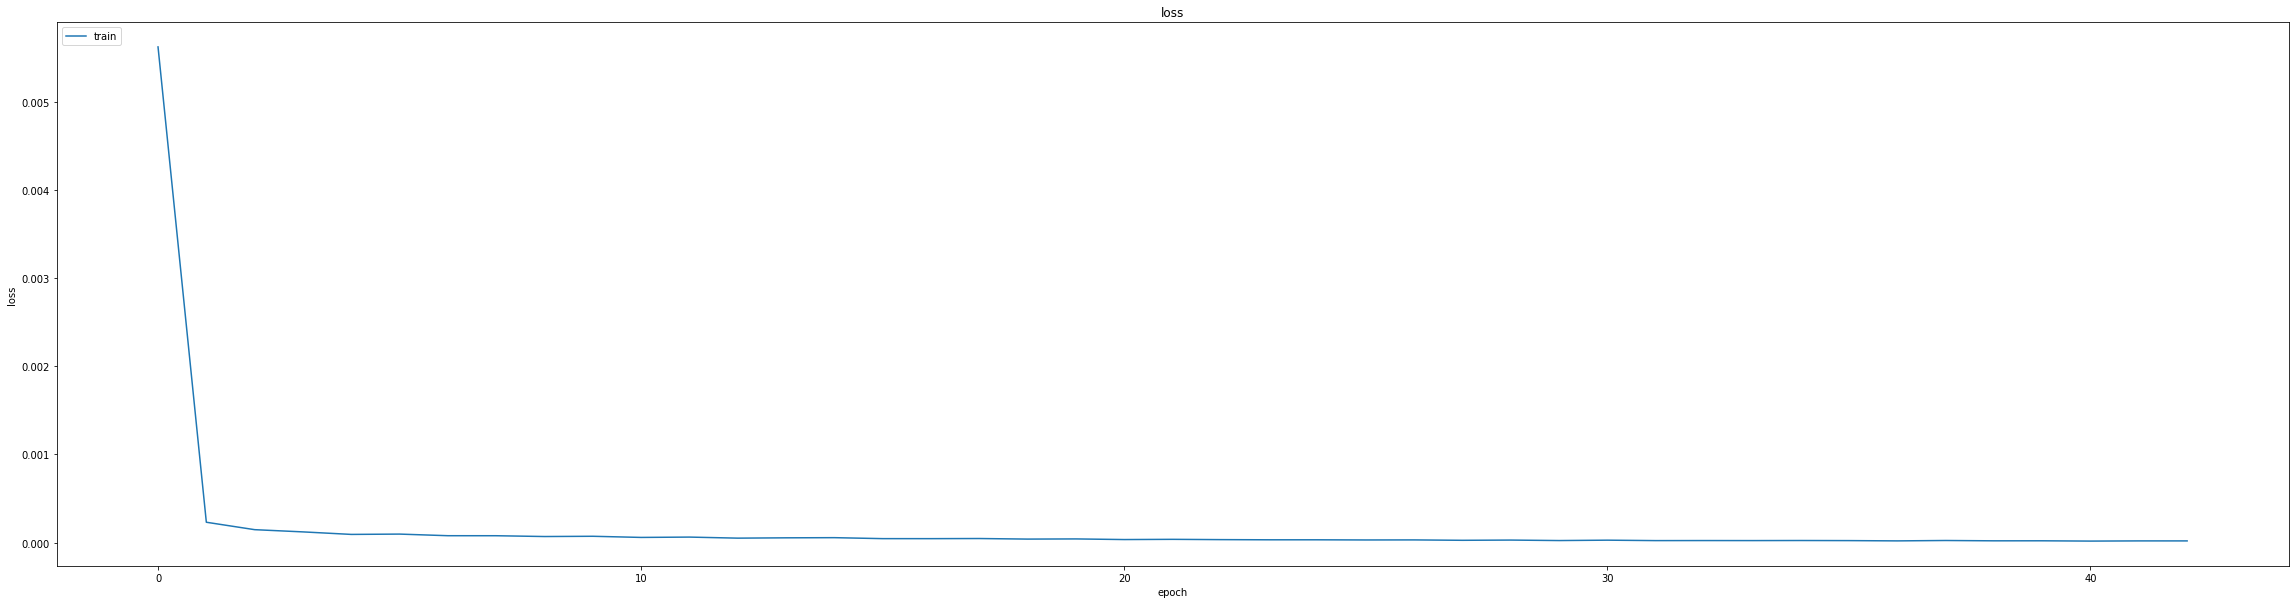

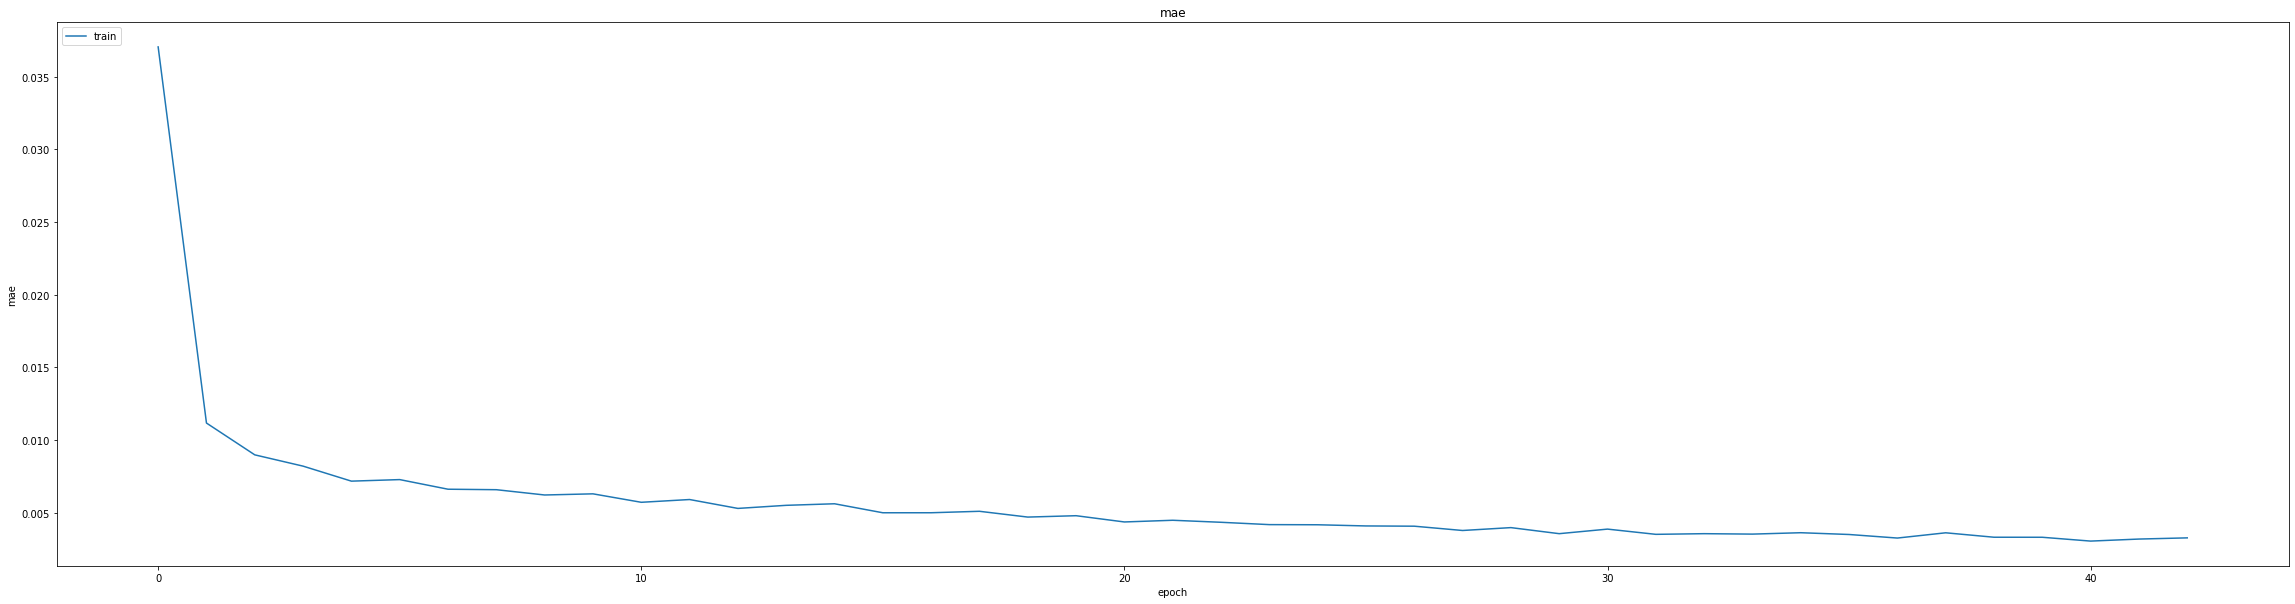

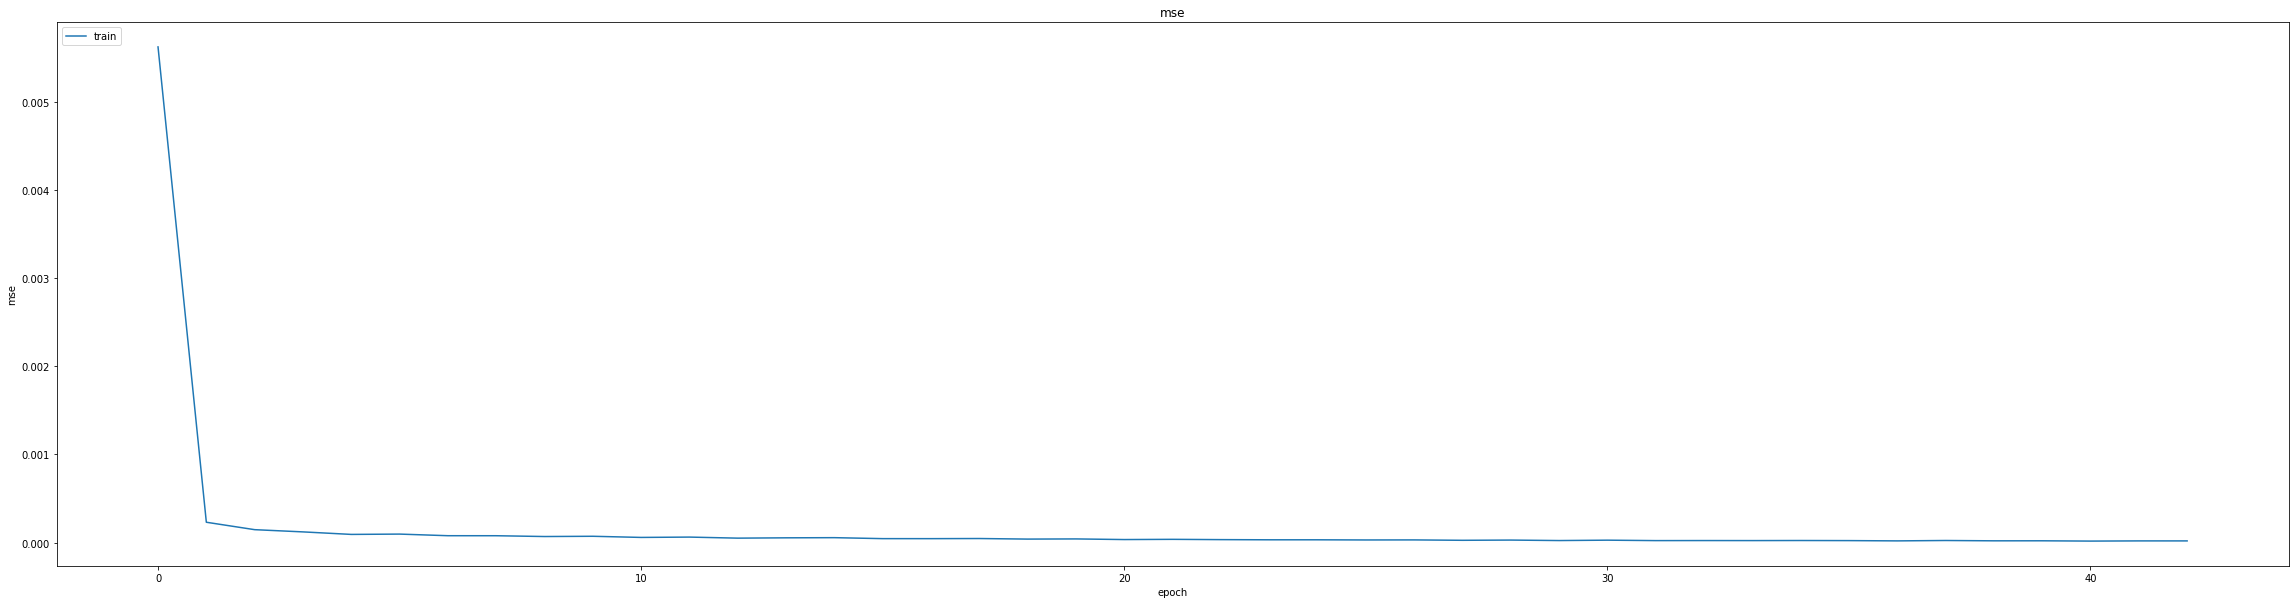

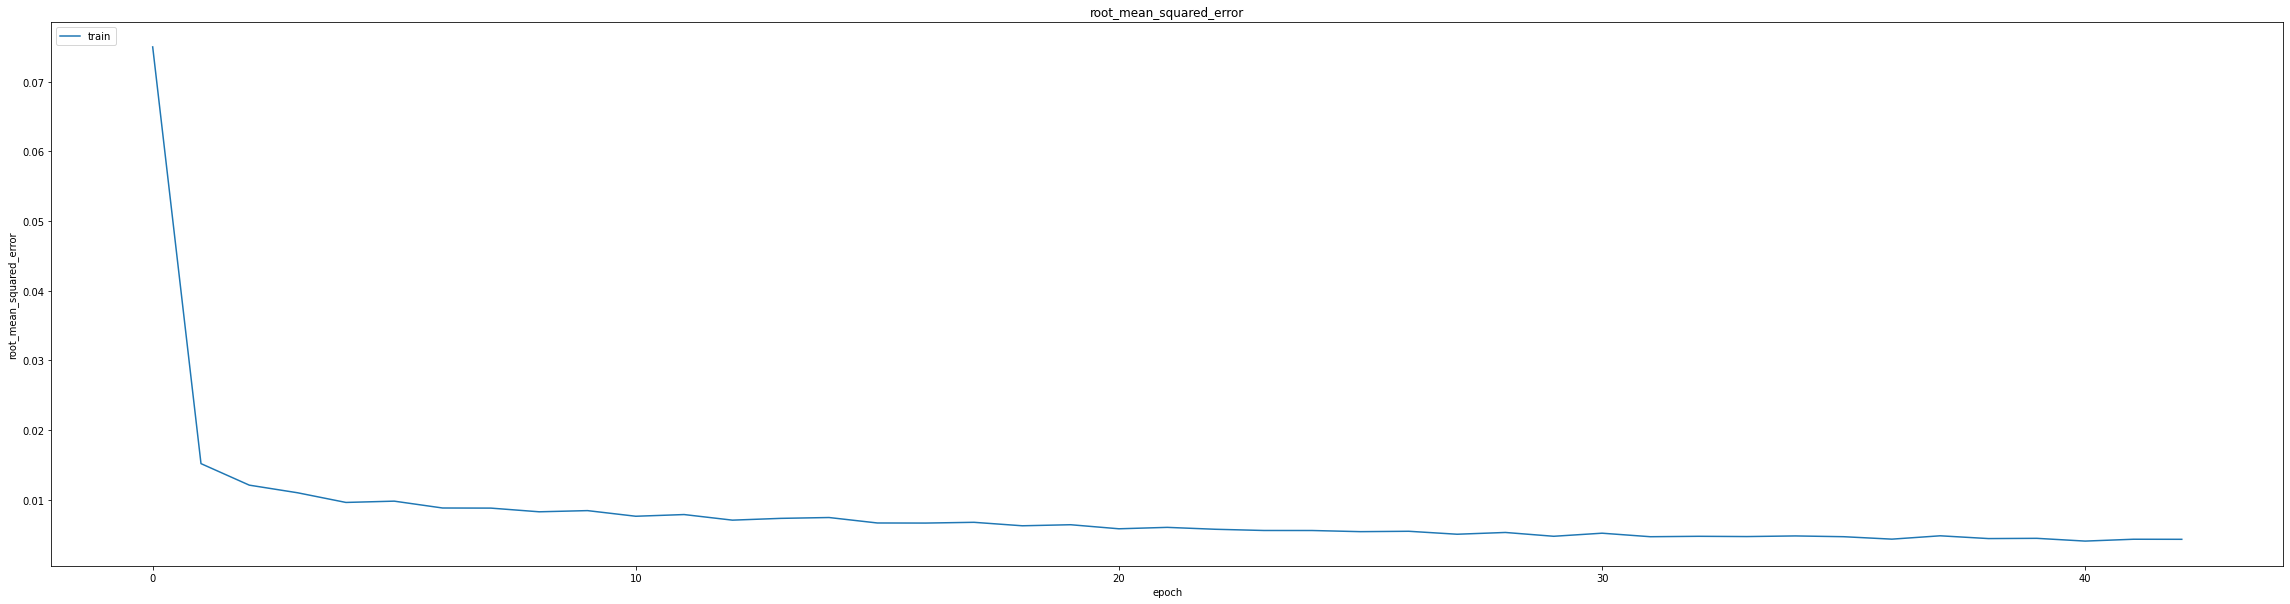

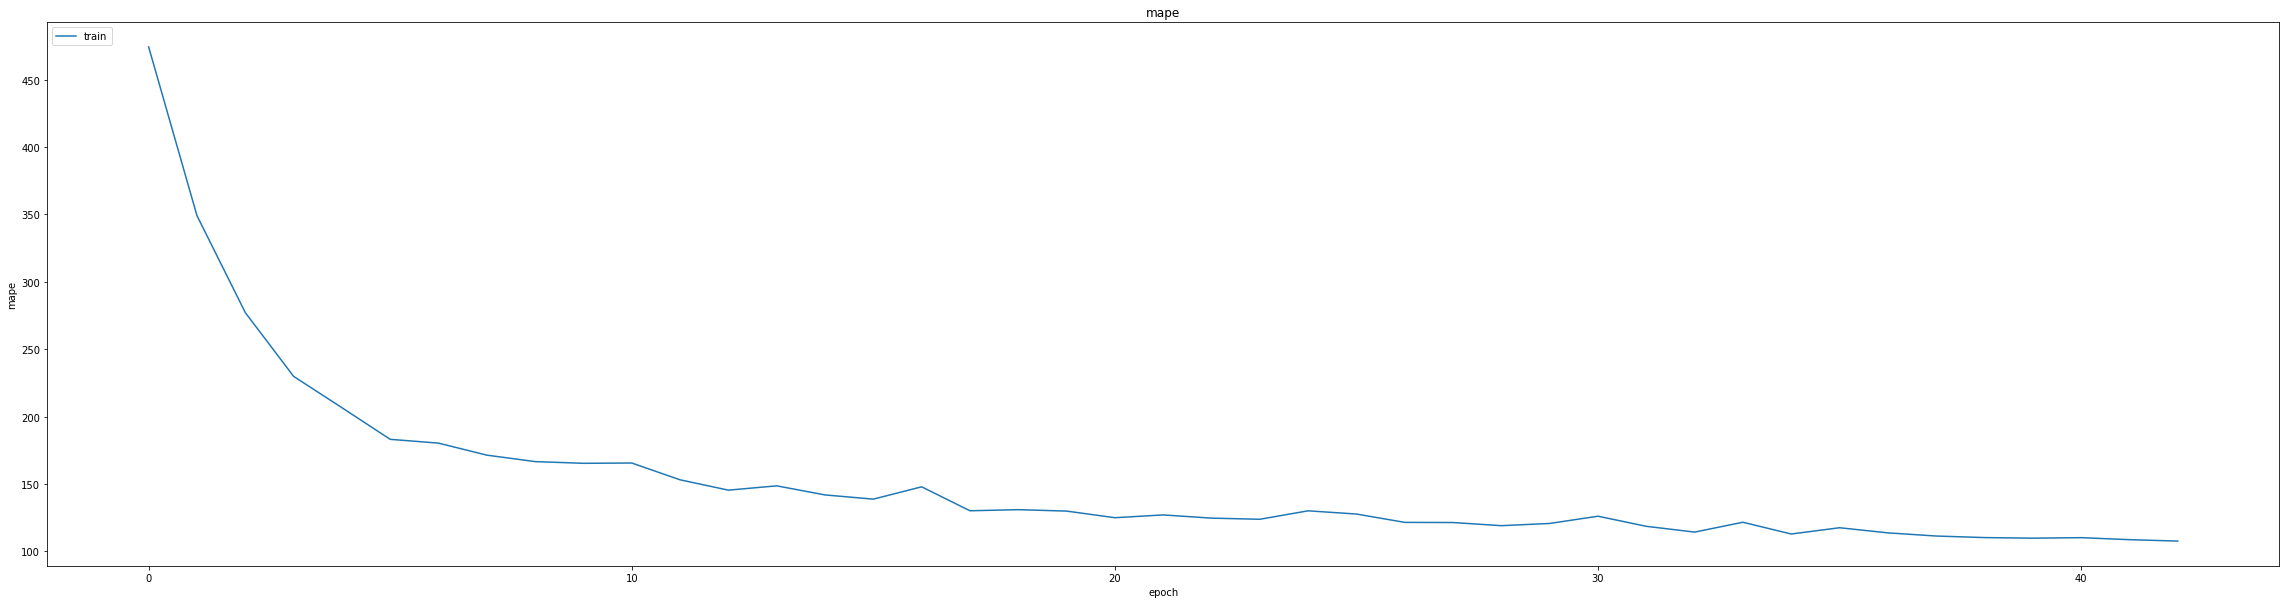

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.012593871913850307
0.01749490760266781
687/687 [==============================] - 31s 43ms/step
0.9678164074166669


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CAD15minGRU.hdf5")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=20
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
463/463 [==============================] - ETA: 0s - loss: 8.2206e-05 - mae: 0.0045 - mse: 8.2206e-05 - root_mean_squared_error: 0.0091 - mape: 107.7875
Epoch 1: val_mse did not improve from 0.00031
463/463 [==============================] - 266s 543ms/step - loss: 8.2206e-05 - mae: 0.0045 - mse: 8.2206e-05 - root_mean_squared_error: 0.0091 - mape: 107.7875 - val_loss: 0.0012 - val_mae: 0.0330 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0348 - val_mape: 850.2857 - lr: 0.0010
Epoch 2/20
463/463 [==============================] - ETA: 0s - loss: 1.5693e-05 - mae: 0.0030 - mse: 1.5693e-05 - root_mean_squared_error: 0.0040 - mape: 105.6544
Epoch 2: val_mse did not improve from 0.00031
463/463 [==============================] - 245s 529ms/step - loss: 1.5693e-05 - mae: 0.0030 - mse: 1.5693e-05 - root_mean_squared_error: 0.0040 - mape: 105.6544 - val_loss: 0.0011 - val_mae: 0.0319 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0338 - val_mape: 823.8788 - lr: 0.0010
lr c

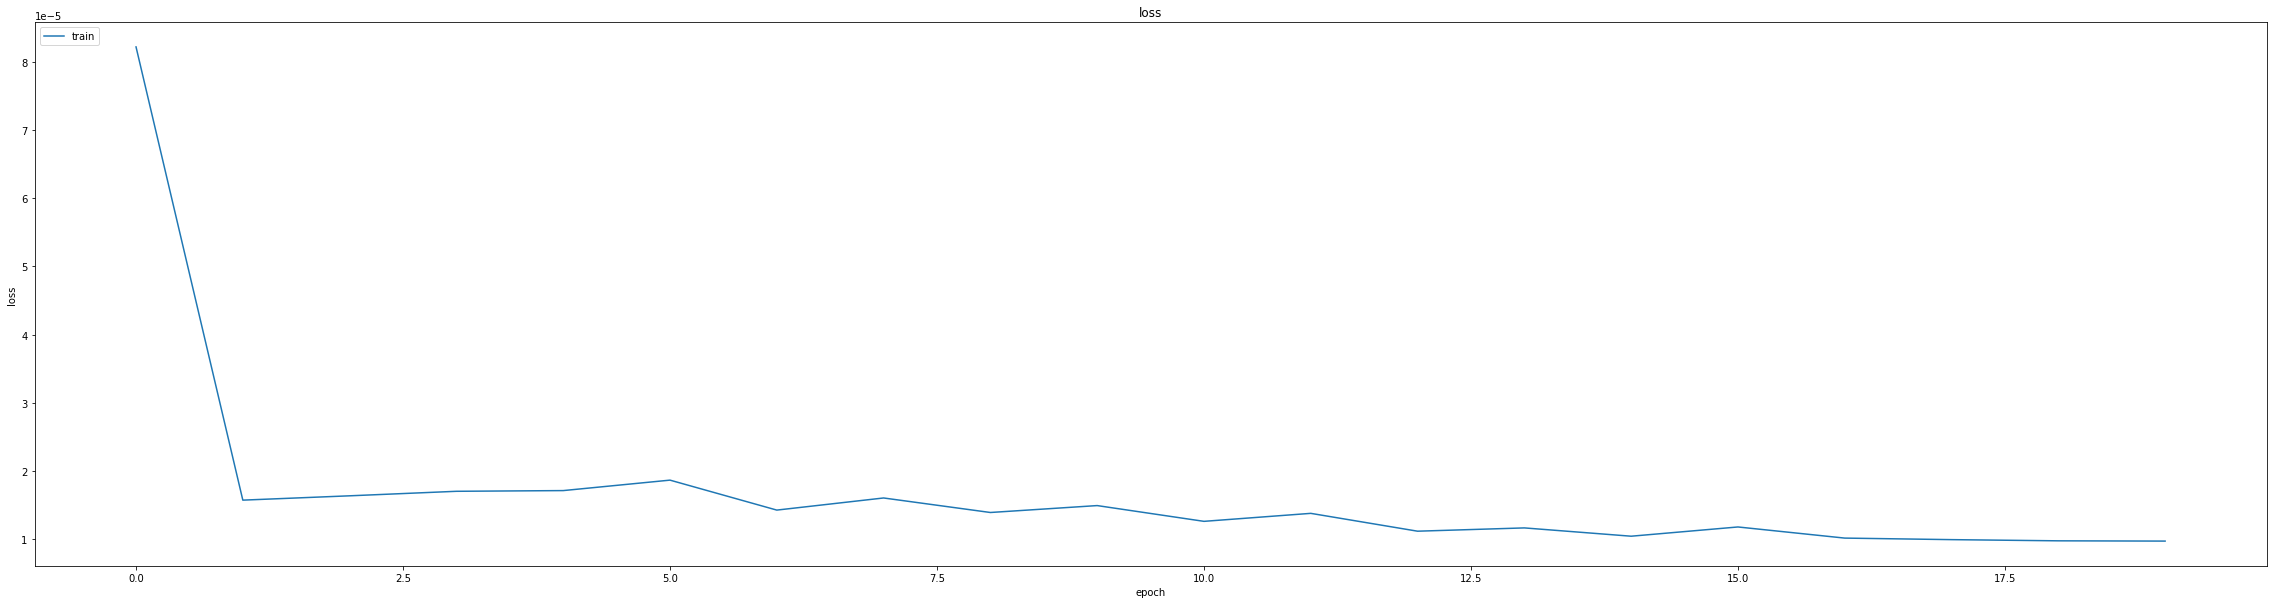

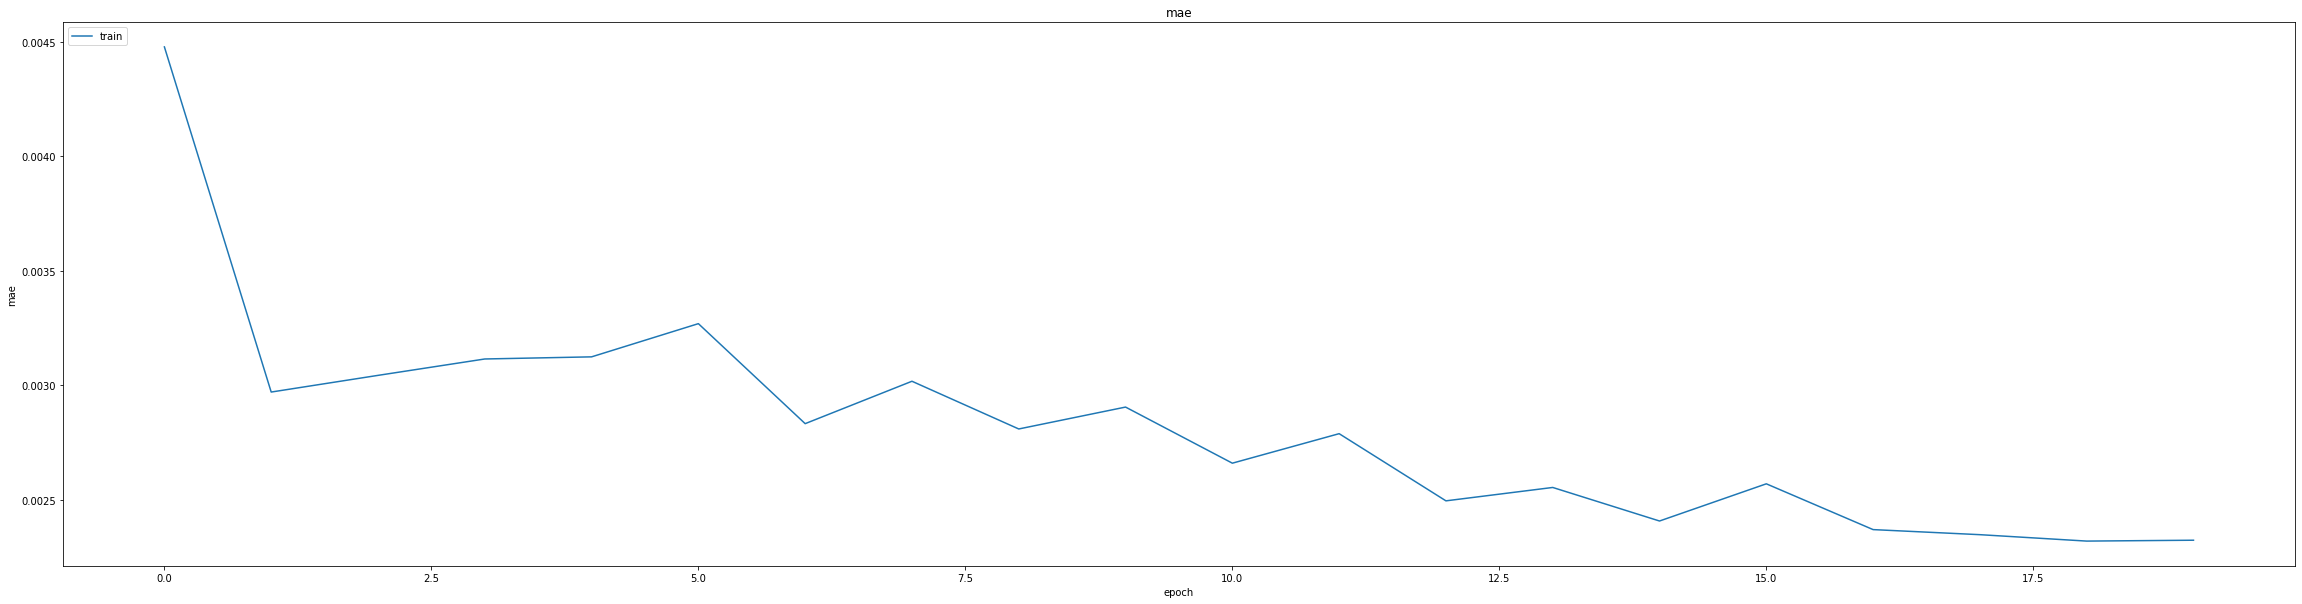

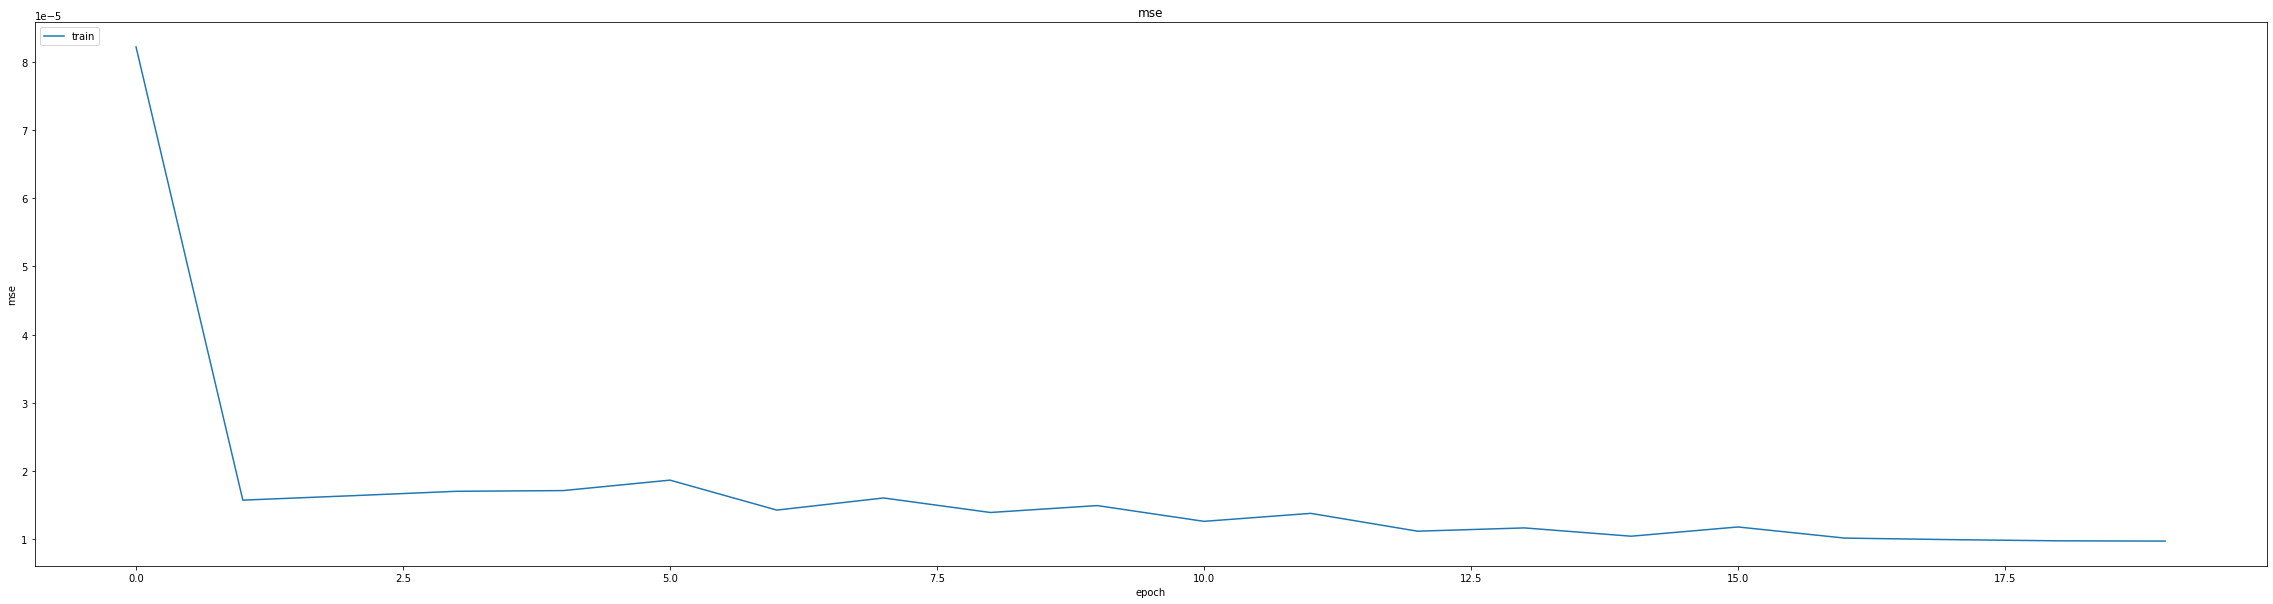

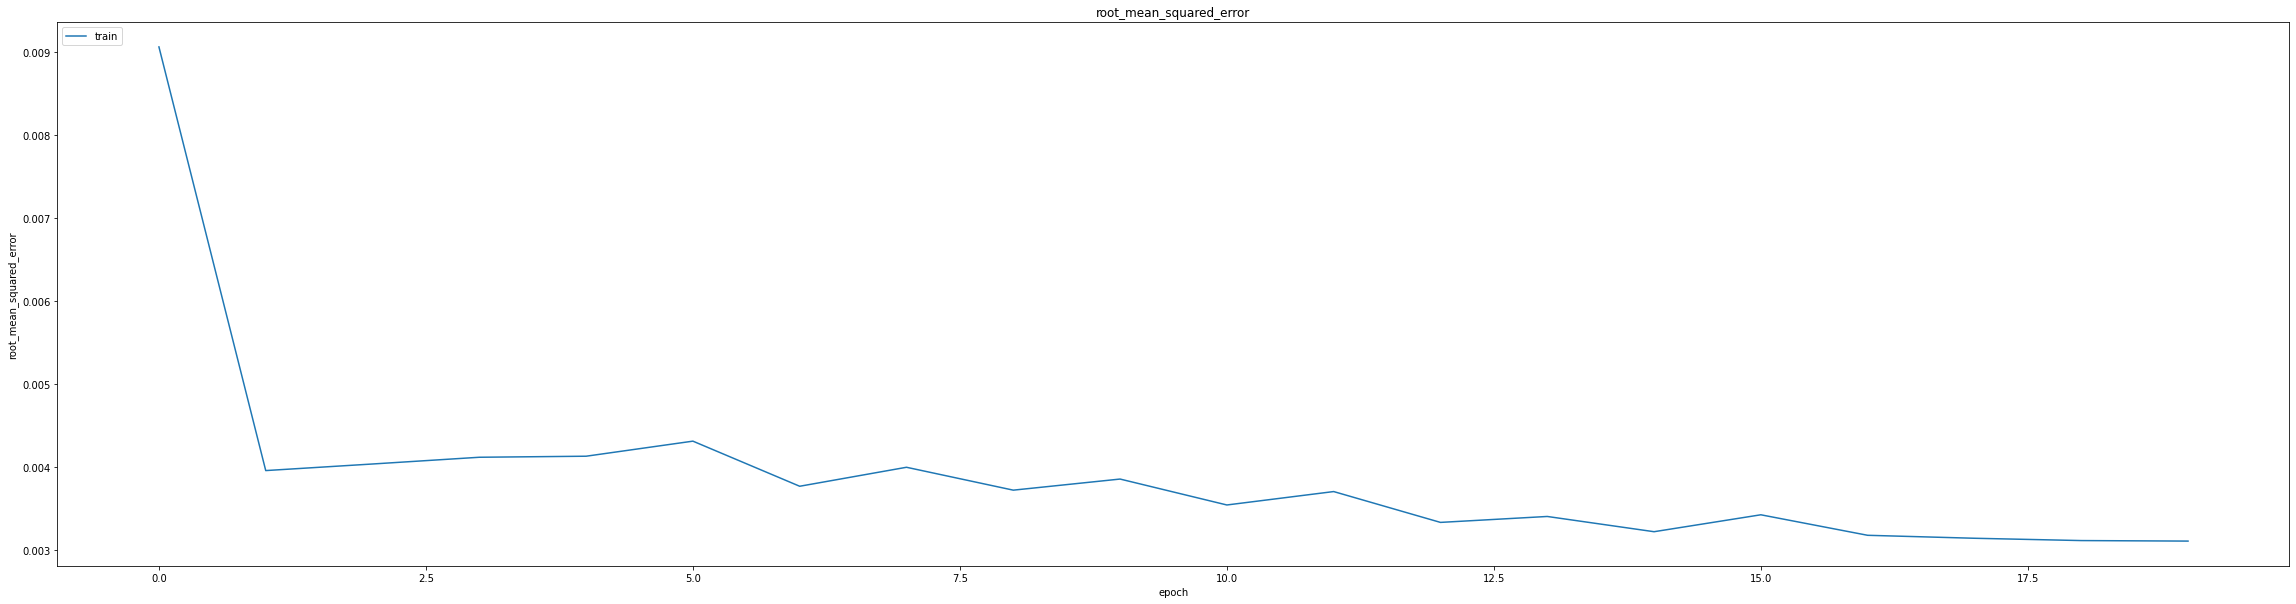

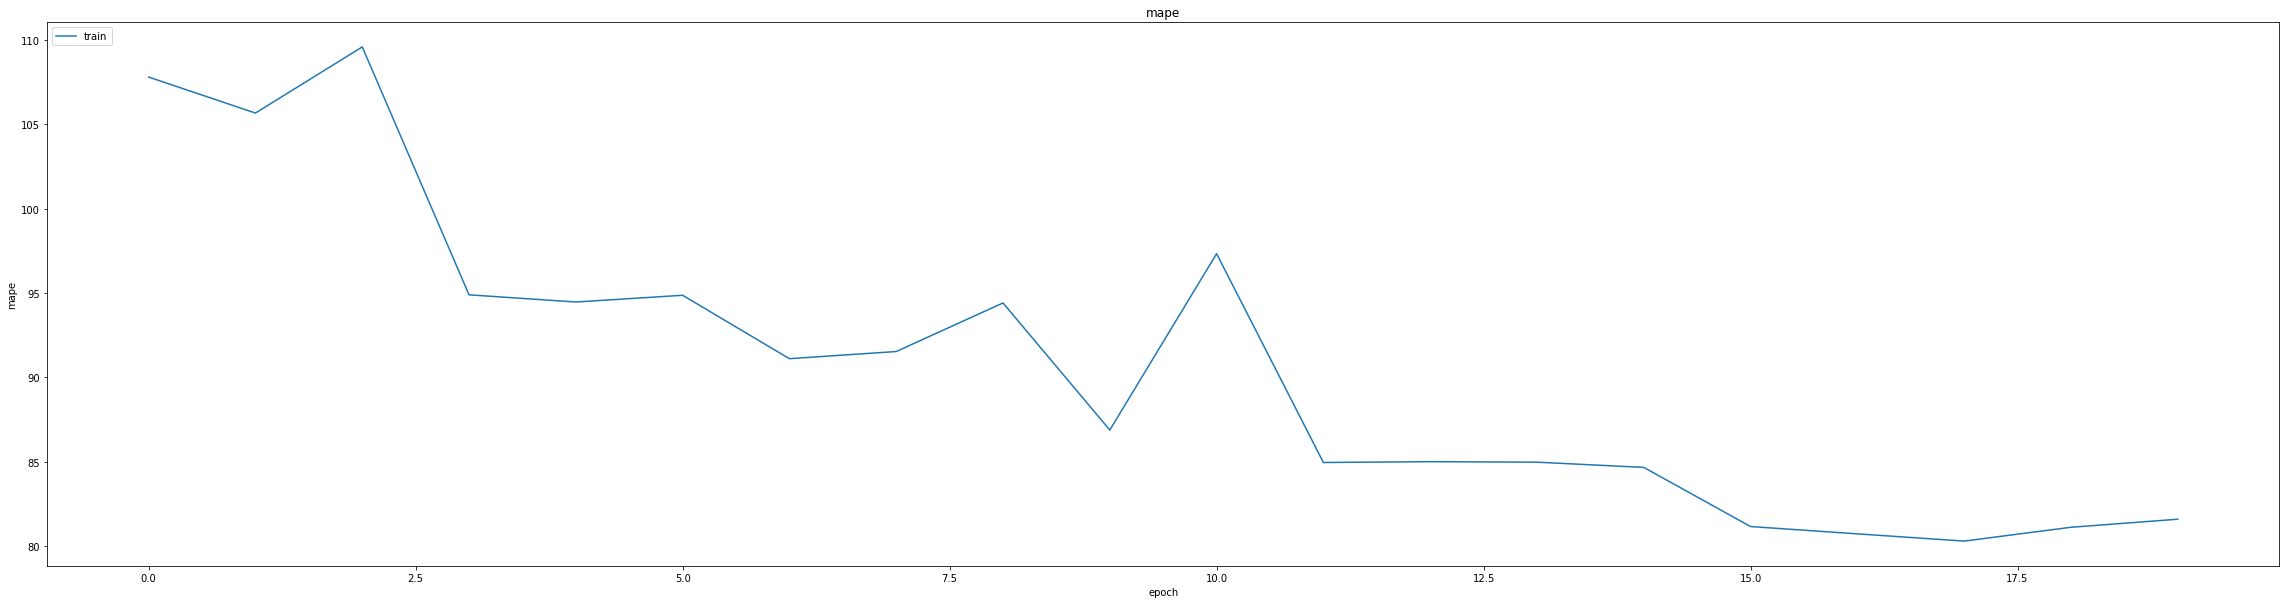

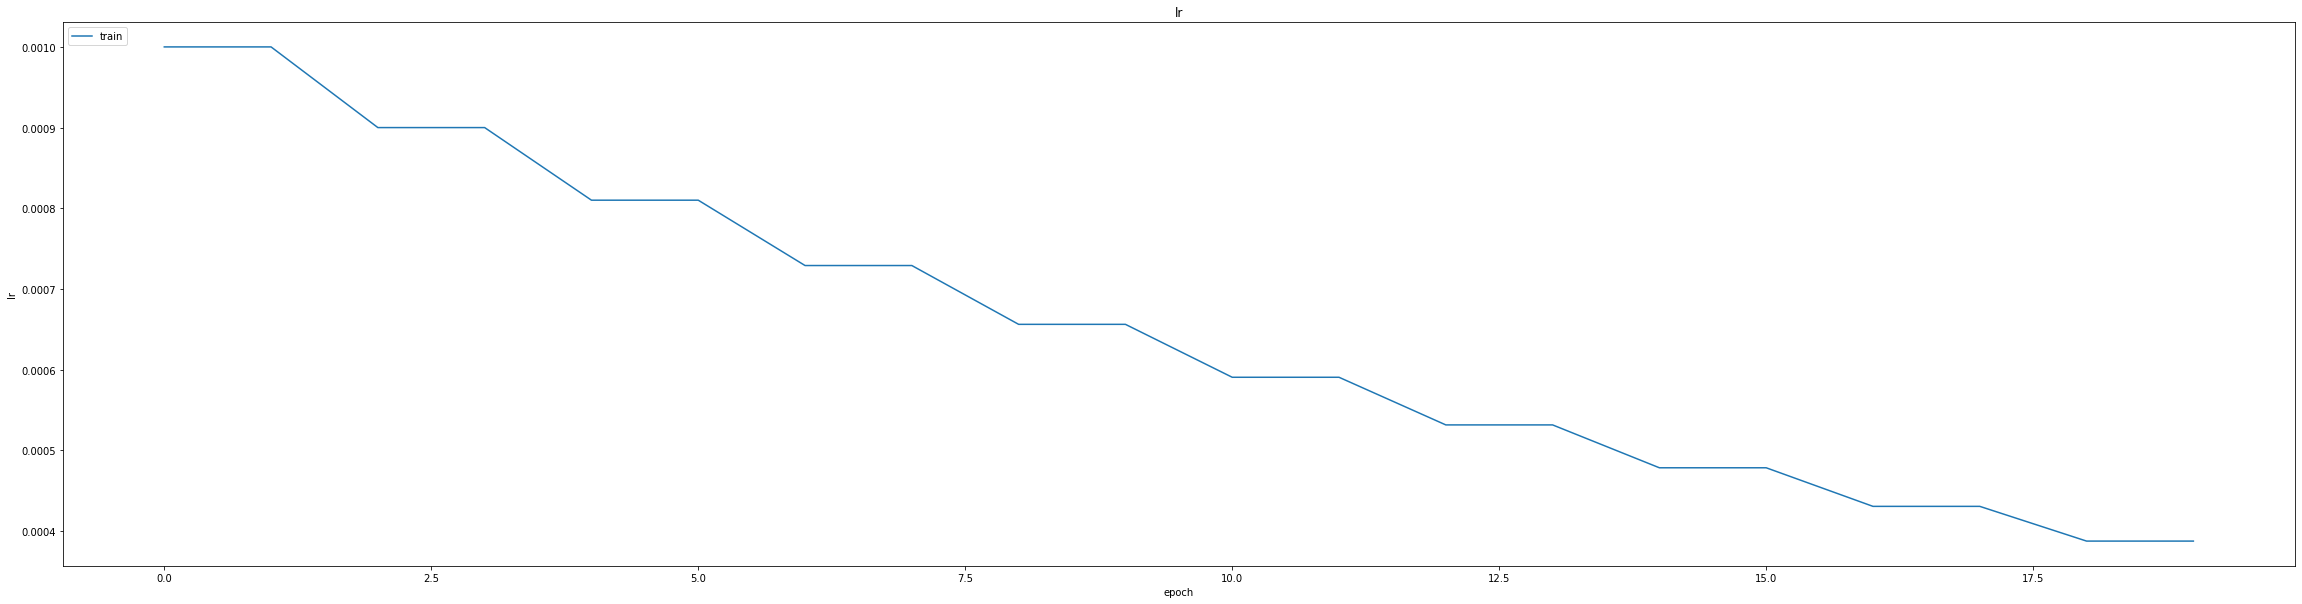

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.03113383799791336
0.032950274646282196
687/687 [==============================] - 27s 37ms/step
0.9670369075630516


687/687 [==============================] - 20s 29ms/step


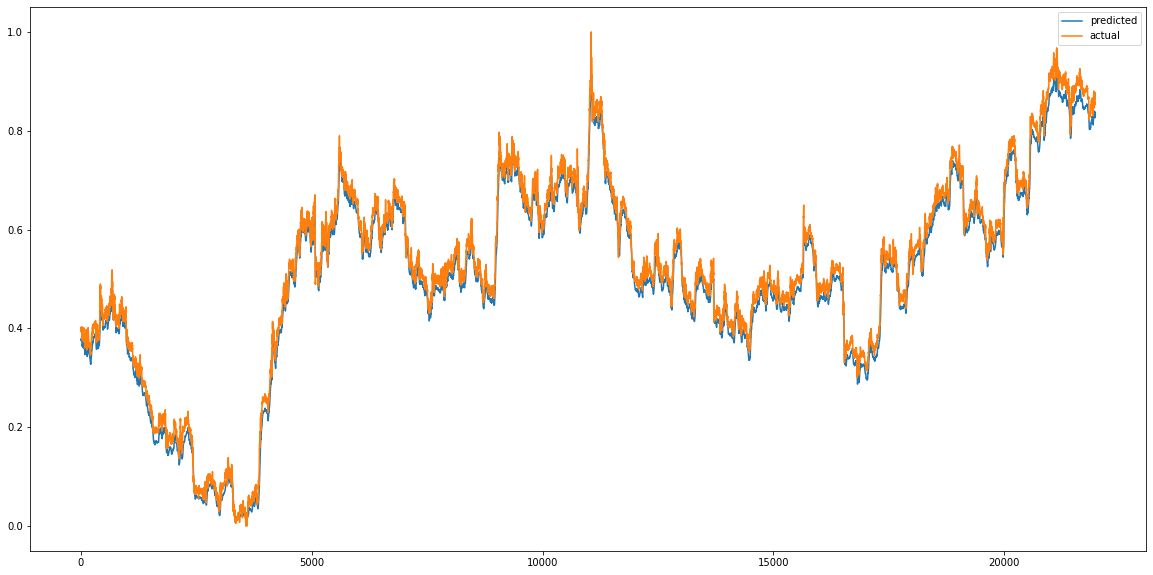

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CAD15minGRU.hdf5")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


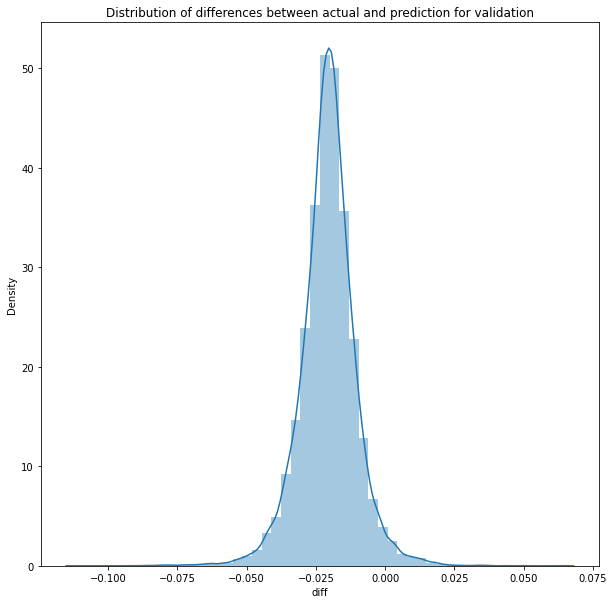

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

704/704 [==============================] - 21s 29ms/step


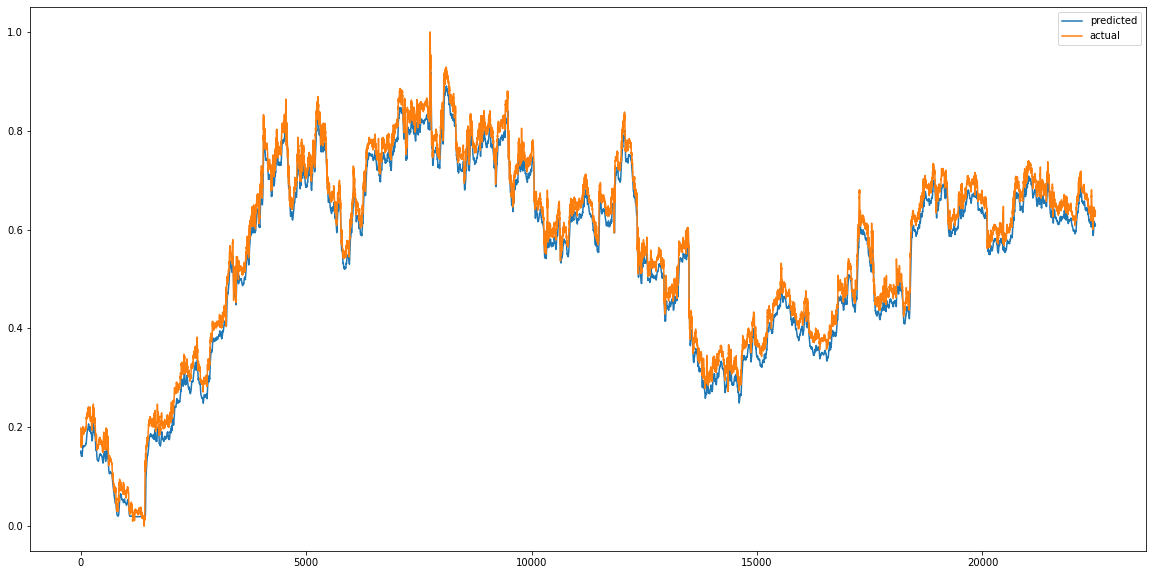

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


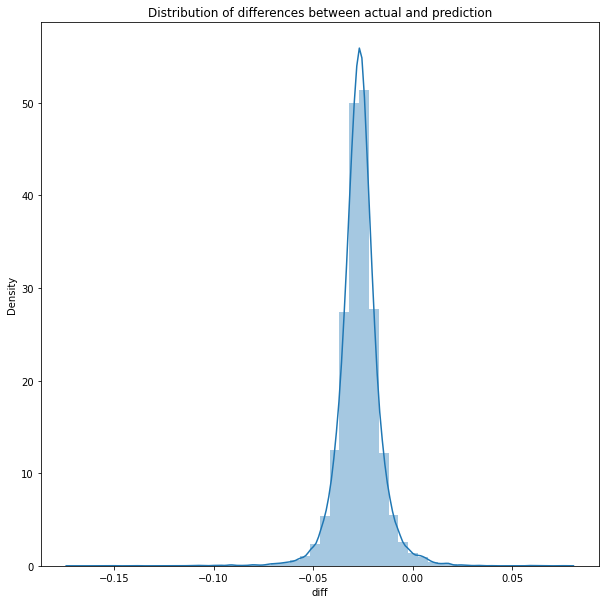

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt

print('RMSE  :', sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :',test_r2_scr)


predictions['diff'].describe()

MSE :  0.0008249621783312621
MAE :  0.027053800396500387
RMSE  : 0.028722154834400257
704/704 [==============================] - 23s 32ms/step
R2_Score  : 0.9795889058684766


count    22505.000000
mean        -0.026826
std          0.010263
min         -0.169902
25%         -0.031780
50%         -0.026806
75%         -0.021914
max          0.076635
Name: diff, dtype: float64